Name: Muhammad Abeer Ayyaz 

Matric Number: 17206725

Lecturer: Dr. Nurfikri Norjoharuddeen

Computing Assignment

Title: Numerical simulation of 2 dimensional heat equation using the explicit method


Heat equation in 2 dimensions is given by:

$\frac{\partial T}{\partial t}=\alpha [(\frac{\partial T^2 }{\partial x^2})+(\frac{\partial T^2 }{\partial y^2})]$  -------------->   Equation 1

The length and width we take for this 2 dimensional steel rod are:

Length = 0.1 m

Width = 0.1 m 

$\alpha$ = 1.172E-5




In [33]:
import numpy as np
from mpl_toolkits import mplot3d 
import matplotlib.pyplot as plt

# Physical parameters
alpha = 1.172E-5 # steel
Lx = 0.1 # length
Ly = 0.1 # width

Now we will define the numerical parameters. In the x direction we will take a total of 40 points. Similarly, for y-axis we also take 40 points. For time we will have a step size of 0.1 with the final time being 10 seconds.

In [34]:
# Numerical parameters
nx = 40 # number of points in x direction
ny = 40 # number of points in y direction
dt = 0.1 # time step
tf = 10 # final time

Now we move on to describe the boundary conditions. Following are the boundary conditions we take for this respective problem.

T0=1

T1=0

T2=0

T3=0

T4=0

In [35]:
# Boundary conditions 
T0=1; 
T1=0;
T2=0;
T3=0;
T4=0;

Now we can find the cell length. Initialize the array "T" and fill it up with the boundary conditions. And generate a mesh to form our numerical simulation.

In [36]:
# Computes cell length
dx = Lx/nx;
dy = Ly/ny;

# Courant numbers
r1 = alpha*dt/(dx**2);
r2 = alpha*dt/(dy**2);


T = np.zeros((nx,ny,int(tf/dt)))

# Initial condition
for i in range(0,nx-1):
	for j in range(1,ny-1):
		T[i,j,0] = T0

# Boundary conditions set-up
for i in range(0,nx):
	T[i,0,0]=T1
	T[i,ny-1,0]=T2

for j in range(0,ny):
	T[0,j,0]=T3
	T[nx-1,j,0]=T4

# Generate 2D mesh
X = np.linspace(0, Lx, nx, endpoint=True)
Y = np.linspace(0, Ly, ny, endpoint=True)
X, Y = np.meshgrid(X, Y)


Now we discretize Equation 1 to numerically simulate equation 1 with the repsective boundary equations. We will use the explicit method to discretize the equation.

$\frac{\partial T}{\partial t}= \frac{T_{i,j}^{k+1}-T_{i,j}^{k}}{\Delta t}$  ------------------------>Equation  2.1

$\frac{\partial T^2 }{\partial x^2}= \frac{T_{i+1,j}^{k}-2T_{i,j}^{k}+T_{i-1,j}^{k}}{\Delta x^{2}}$---------------->Equation 2.2

$\frac{\partial T^2 }{\partial y^2}= \frac{T_{i,j+1}^{k}-2T_{i,j}^{k}+T_{i,j-1}^{k}}{\Delta y^{2}}$---------------->Equation 2.3

Now we substitute Equation 2.1, 2.2 and 2.3 into Equation 1 and we get:

$\frac{T_{i,j}^{k+1}-T_{i,j}^{k}}{\Delta t}= \alpha(\frac{T_{i+1,j}^{k}-2T_{i,j}^{k}+T_{i-1,j}^{k}}{\Delta x^{2}} + \frac{T_{i,j+1}^{k}-2T_{i,j}^{k}+T_{i,j-1}^{k}}{\Delta y^{2}})$

Now simplifying this by taking Equation 2.2 as "a" and Equation 2.3 as "b" we can get our explicit scheme in terms of k terms as shown below. 

$T_{i,j}^{k+1}=\alpha \Delta t(\frac{a}{\Delta x^{2}}+\frac{b}{\Delta y^{2}})$------------>Equation 3

where,

$a = T_{i+1,j}^{k}-2T_{i,j}^{k}+T_{i-1,j}^{k}$    and,

$b = T_{i,j+1}^{k}-2T_{i,j}^{k}+T_{i,j-1}^{k}$

We now have our iterative sequence which will be used to fill up the array till end of time "tf" which in this case is 10 seconds


In [37]:
# Main time-loop
for t in range (0,int(tf/dt)-1):
	for i in range(1,(nx-1)):
		for j in range (1,(ny-1)):				
			a=(T[i+1,j,t]-2*T[i,j,t]+T[i-1,j,t])/dx**2 # d2dx2
			b=(T[i,j+1,t]-2*T[i,j,t]+T[i,j-1,t])/dy**2 # d2dy2
			T[i,j,t+1]=alpha*dt*(a+b)+T[i,j,t]

Now after this we can plot our explicit scheme by plotting (x,y,T)

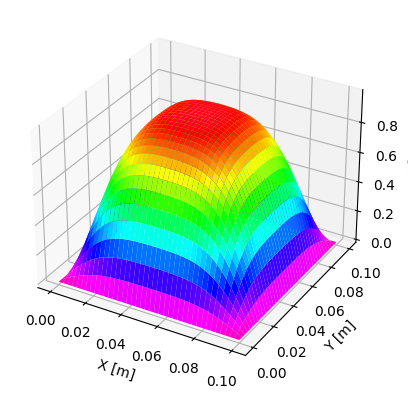

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, T[:,:,int(tf/dt)-1], cmap = 'gist_rainbow_r', edgecolor = 'none')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('T [°]')
plt.show()

References: -

Aliyu, B. and S. Olatoyinbo (2021). Explicit and Implicit Solutions to 2-D Heat Equation.
	
